<a href="https://colab.research.google.com/github/christmasv/Estrategias-Efectivas-de-Gestion-y-Desarrollo-de-Proyectos-de-BI/blob/main/stats_fundamental_ds_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Estadistica Basica | DS - 01


 **Author** = [Christopher Soto](https://twitter.com/csv_81)

    @article{khrizoto,
    Title        = {Stats Fundamental | DS - 01},
    Howpublished = {\url{https://khrizoto.wordpress.com/}},
    Year         = {2023}
    }

**Descripción:**

# Análisis exploratorio de datos

Análisis exploratorio de datos

# **Términos clave de la estimación de la localización**

***Media***

Suma de todos los valores dividida por el número de valores.

*Sinónimos*

promedio

***Media ponderada***

Suma de todos los valores multiplicados por cada ponderación y dividida por la suma de las
ponderaciones.*Sinónimo*

promedio ponderado

***Mediana***

Valor tal que la mitad del número de datos se encuentra por encima y la otra mitad por
debajo de dicho valor.*Sinónimo*

Percentil 50

***Percentil***

Valor tal que el *P* por ciento de los datos se encuentra por debajo del mismo.
*Sinónimo*

cuantil

***Mediana ponderada***

Valor tal que la mitad de la suma de las ponderaciones se encuentra por encima y la otra
mitad por debajo de los datos ordenados.

***Media recortada***

El promedio de todos los valores después de eliminar un número fijo de valores extremos.

*Sinónimo*

media truncada

***Robusto***

Insensible a valores extremos.

*Sinónimo*

resistente

***Atípico***

Valor de un dato que es muy diferente de la mayoría de los valores de datos.

*Sinónimo*

valor extremo


In [ ]:
#Instalamos librerias necesarias para trabajar
!pip install wquantiles

In [8]:
#Importamos librerias necesarias. matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [ ]:
#Definir rutas a conjuntos de datos. Si no mantiene sus datos en el mismo directorio que el código, adapte los nombres de las rutas.

AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

# Estimaciones de ubicación
## Ejemplo: Estimaciones de ubicación de población y tasas de asesinatos

In [9]:
# Tabla 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Calcule la media, la media recortada y la mediana para la población. Para `media` y `mediana` podemos usar los métodos _pandas_ del marco de datos. La media recortada requiere la función `trim_mean` en _scipy.stats_.



**Media**
La estimación más elemental para la localización es el valor medio o promedio (average). La media es la suma de todos los valores dividida por el número de valores. Consideremos el siguiente conjunto de números: {3 5 1 2}. La media es (3 + 5 + 1 +2) / 4 = 11/4 = 2.75. Nos encontraremos el símbolo x (pronunciado "barra x") que se utiliza para representar la media de la muestra de una población. La fórmula para calcular la media de un conjunto de n valores x1, x2, ..., xn es: 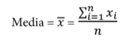

In [10]:
state = pd.read_csv(STATE_CSV)
print(state['Population'].mean())

6162876.3



N (o n) se refiere al número total de registros u observaciones. En estadística, se escribe con mayúscula si se refiere a una población y en minúscula si se refiere a una muestra de una población. En la ciencia de datos, esa distinción no es vital, por lo que se puede ver de las dos formas.

**Media Truncada (trimmed mean),** que se calcula ignorando un número fijo, en cada extremo, de valores ordenados y a continuación se calcula el promedio de los valores restantes. Al representar los valores ordenados por x(1), x(2), ..., x(n) donde x(1) es el valor más pequeño y x(n) el valor más grande, la fórmula para calcular la media recortada con los p valores más pequeños y más grandes omitidos es: 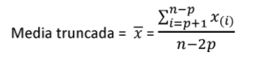

In [11]:
print(trim_mean(state['Population'], 0.1))

4783697.125


**Media Ponderada (weighted mean)**, que se calcula multiplicando cada valor de datos xi por el peso wi especificado por el usuario y dividiendo su suma por la suma de las ponderaciones. La fórmula para una media ponderada es: 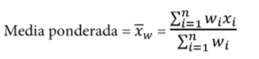


**La mediana (median)** es el valor central de una lista de datos ordenados de menor a mayor. Si hay un número par de valores de datos, el valor medio es uno que no está realmente en el conjunto de datos, sino el promedio de los dos valores que dividen los datos ordenados en mitades superior e inferior. En comparación con la media, que utiliza todas las observaciones, la mediana depende solo de los valores situados en el centro de los datos ordenados.

In [12]:
print(state['Population'].median())

4436369.5


La media ponderada está disponible con numpy. Para la mediana ponderada, podemos utilizar el paquete especializado `wquantiles` (https://pypi.org/project/wquantiles/).


In [13]:
print(state['Murder.Rate'].mean())

4.066


***Mediana ponderada***

Valor tal que la mitad de la suma de las ponderaciones se encuentra por encima y la otra
mitad por debajo de los datos ordenados.

In [14]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


**La mediana ponderada** es un valor tal que la suma de las ponderaciones es igual para las mitades inferior y superior de la lista ordenada. Como la mediana, la mediana ponderada es robusta a valores atípicos.

In [15]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


**Valores atípicos**
Un valor atípico es cualquier valor que está muy lejos de los otros valores en el conjunto de datos.Cuando los valores atípicos son el resultado de datos incorrectos, la media dará como resultado una estimación deficiente de la localización, mientras que la mediana seguirá siendo válida.

---

**Detección de anomalías**

En contraste con el análisis normal de datos, donde los valores atípicos son a veces informativos y a veces molestos, en la detección de anomalías (anomaly detection) los puntos que nos interesan son los valores atípicos, y la mayor masa de datos sirve principalmente para definir la "normalidad" con la que se miden las anomalías.

**Estimaciones de variabilidad**

In [16]:
# Table 1-2
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [17]:
# Desviacion Estandar
print(state['Population'].std())

6848235.347401142


# Términos clave de métricas de variabilidad
**Desviaciones**
Diferencias entre los valores observados y la estimación de la localización.
Sinónimos
errores, residuales
**Varianza**
Suma de los cuadrados de las desviaciones de la media al cuadrado y dividida por n – 1, donde n es el número de valores de datos.
Sinónimo
error cuadrático medio
**Desviación estándar**
Raíz cuadrada de la varianza.
Desviación media absoluta
Media de los valores absolutos de las desviaciones de la media.
Sinónimos
norma L1, norma Manhattan
**Desviación absoluta mediana de la mediana
Mediana** de los valores absolutos de las desviaciones de la mediana.
**Rango**
La diferencia entre el mayor y el menor valor de un conjunto de datos.
**Estadísticos ordinales**
Métricas basadas en los valores de datos ordenados de menor a mayor.
Sinónimo
rangos
**Percentil**
Valor tal que el P por ciento de los valores toma este valor o un valor inferior y para (100 – P) el porcentaje toma este valor o un valor superior.
Sinónimo
cuantil
**Rango intercuartil**
Diferencia entre el percentil 75 y el percentil 25.
Sinónimo
IQR

Las estimaciones de variabilidad más conocidas son la varianza (variance) y la desviación estándar (standard deviation), que se calculan a partir del cuadrado de las desviaciones. La varianza es un promedio del cuadrado de las desviaciones y la desviación estándar es la raíz cuadrada de la varianza:

**La desviación estándar** es mucho más fácil de interpretar que la varianza, ya que está en la misma escala que los datos originales. Aun así, con su fórmula más complicada y menos intuitiva, podría parecer peculiar que en estadística se prefiera la desviación estándar a la desviación media absoluta. Debe su supremacía a la teoría estadística, ya que trabajar matemáticamente con valores al cuadrado es mucho más conveniente que con valores absolutos, especialmente en el caso de modelos estadísticos.
---

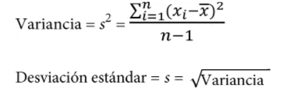

In [18]:
# Desviacion Estandar

print(state['Population'].std())

6848235.347401142


In [19]:
# La desviación absoluta de la mediana de la mediana se puede calcular con un método en _statsmodels_
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


In [20]:
# La desviación absoluta de la mediana de la mediana se puede calcular con un método en _statsmodels_
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336
